In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [98]:
def get_symbol(c):
    if c ==  10:
        return '+'
    if c == 11:
        return '*'
    if c == 12:
        return '-'
    if c == 13:
        return '/'
    return str(c)

In [99]:
def resize_with_padding(image, target_size=28):

    h, w = image.shape
    

    if h > w:
        new_h = target_size
        new_w = int(w * (target_size / h))
    else:
        new_w = target_size
        new_h = int(h * (target_size / w))
    

    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    top = (target_size - new_h) // 2
    bottom = target_size - new_h - top
    left = (target_size - new_w) // 2
    right = target_size - new_w - left
    padded_image = cv2.copyMakeBorder(resized_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    _, padded_image = cv2.threshold(padded_image, 127, 255, cv2.THRESH_BINARY_INV)
    return padded_image


In [100]:
def load_image_and_preprocess(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    horizontal_sum = np.sum(binary_image, axis=1)

    non_zero_rows = np.where(horizontal_sum > 0)[0]
    y_min, y_max = non_zero_rows[0], non_zero_rows[-1]

    cropped_image = binary_image[y_min:y_max + 1, :]

    vertical_sum_cropped = np.sum(cropped_image, axis=0)
    non_zero_columns = np.where(vertical_sum_cropped > 0)[0]

    segments = []
    start = non_zero_columns[0]

    for i in range(1, len(non_zero_columns)):
        if non_zero_columns[i] != non_zero_columns[i - 1] + 1:
            end = non_zero_columns[i - 1]
            segments.append((start, end))
            start = non_zero_columns[i]

    segments.append((start, non_zero_columns[-1]))

    subimages = [cropped_image[:, start:end] for start, end in segments]


    plt.figure(figsize=(12, 6))


    plt.subplot(3, 1, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Oryginalny obraz")


    plt.subplot(3, 1, 2)
    plt.imshow(cropped_image, cmap="gray")
    plt.title("Obraz po przycięciu w pionie")


    plt.subplot(3, 1, 3)
    plt.bar(range(len(vertical_sum_cropped)), vertical_sum_cropped)
    plt.title("Histogram pionowy po przycięciu")
    plt.show()


    for idx, subimage in enumerate(subimages):
        cv2.imwrite(f"subimages_temp/susubimage_{idx}.png", subimage)

    return subimages


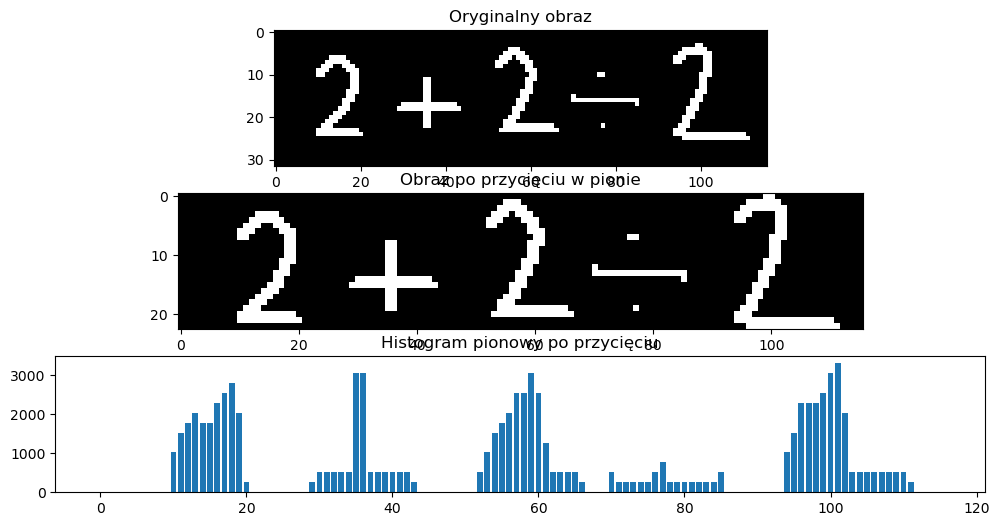

In [101]:
subimages = load_image_and_preprocess("Test.jpg")

In [102]:
model1 = keras.models.load_model('handwritten.keras')
model2 =  keras.models.load_model('handwritten2.keras')

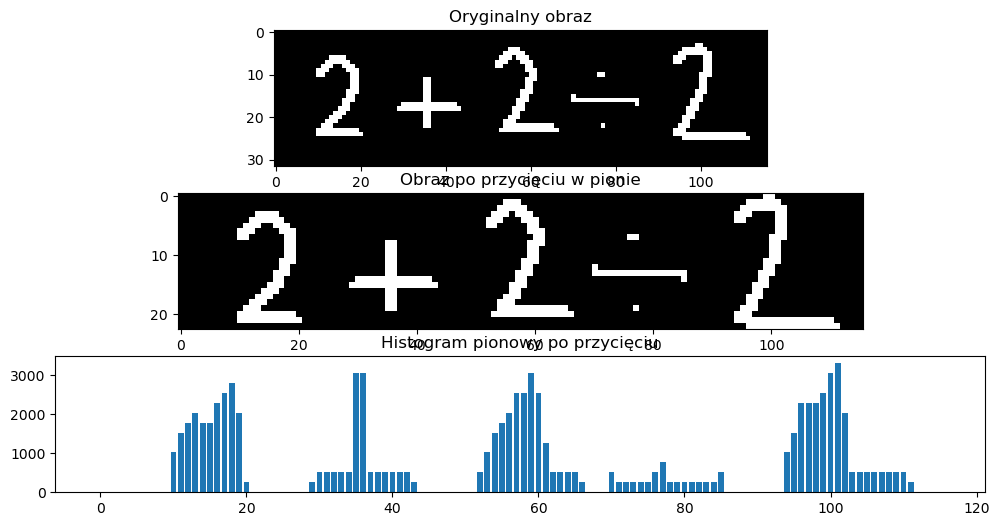

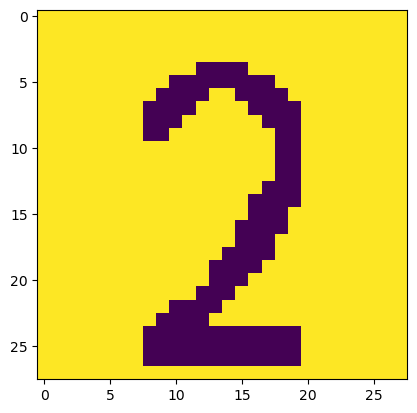

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Model 1: This is 0
Model 2: This is 9
--------------------


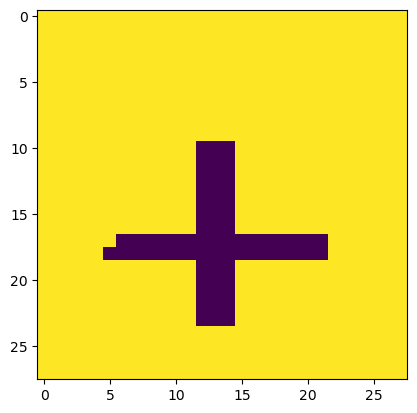

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model 1: This is 0
Model 2: This is 0
--------------------


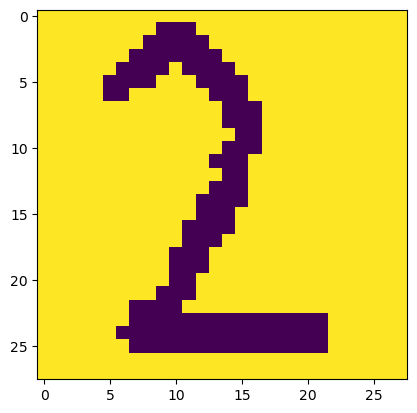

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Model 1: This is 0
Model 2: This is 8
--------------------


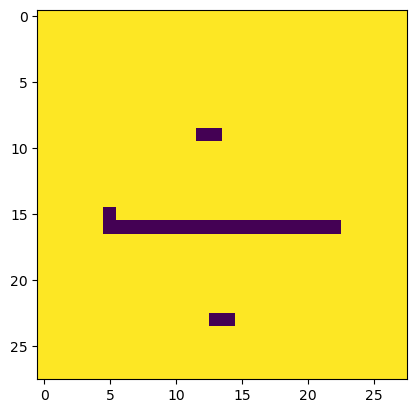

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Model 1: This is 6
Model 2: This is 8
--------------------


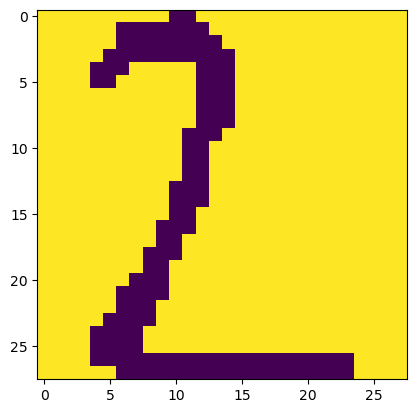

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model 1: This is 0
Model 2: This is 4
--------------------
Final Input1: 00060
Final Input2: 90884


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)

In [103]:
input1 = ""
input2 = ""
subimages = load_image_and_preprocess("Test.jpg")
for i in range(len(subimages)):
    sub = subimages[i]
    resized_sub = resize_with_padding(sub, target_size=28)
    resized_sub = resized_sub.astype("float32") / 255.0
    plt.imshow(resized_sub)
    plt.show()

    resized_sub = np.expand_dims(resized_sub, axis=-1)
    resized_sub = np.expand_dims(resized_sub, axis=0)


    predict1 = model1.predict(resized_sub)
    predict2 = model2.predict(resized_sub)

    
    input1 += get_symbol(np.argmax(predict1))
    input2 += get_symbol(np.argmax(predict2))

    print(f"Model 1: This is {np.argmax(predict1)}")
    print(f"Model 2: This is {np.argmax(predict2)}")
    print("-" * 20)

# Wyświetlenie końcowego wyniku
print(f"Final Input1: {input1}")
print(f"Final Input2: {input2}")

print("Result1", eval(input1))
print("Result1", eval(input2))
